In [1]:
# Import the os library to interact with the operating system, like navigating directories.
import os

# Import the Image module from the PIL (Pillow) library for image manipulation.
from PIL import Image

In [2]:
# Define the path to the original dataset provided.
input_dir = "/kaggle/input/pre-process-data/For-pre-process"

# Define the path where the resized images will be saved.
output_dir = "/kaggle/working/resized-data"

# Check if the output directory exists, if not, create it.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [4]:
# Import only basic libraries (no skimage)
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import os

print("Basic libraries imported successfully")
print("Ready for error-free histogram equalization")

# Dataset path (continuing from your step 2)
input_directory = "/kaggle/input/pre-process-data/For-pre-process"
categories = ['cardboard', 'glass', 'metal', 'paper', 'plastic']


Basic libraries imported successfully
Ready for error-free histogram equalization


In [5]:
def histogram_equalization_simple(image_array):
    """
    Simple histogram equalization using NumPy only
    Args:
        image_array: Input image as numpy array (0-255)
    Returns:
        Equalized image array
    """
    # Process each channel separately
    equalized_image = np.zeros_like(image_array)
    
    for channel in range(3):  # RGB channels
        # Get current channel
        channel_data = image_array[:, :, channel]
        
        # Calculate histogram
        hist, bins = np.histogram(channel_data.flatten(), 256, [0, 256])
        
        # Calculate cumulative distribution function (CDF)
        cdf = hist.cumsum()
        
        # Normalize CDF to 0-255 range
        cdf_normalized = np.round((cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())).astype('uint8')
        
        # Apply equalization using lookup table
        equalized_image[:, :, channel] = cdf_normalized[channel_data]
    
    return equalized_image

def contrast_enhancement_simple(image_array, factor=1.5):
    """
    Simple contrast enhancement alternative
    Args:
        image_array: Input image array
        factor: Contrast enhancement factor
    Returns:
        Enhanced image
    """
    # Convert to PIL Image for processing
    pil_image = Image.fromarray(image_array.astype('uint8'))
    
    # Enhance contrast
    enhancer = ImageEnhance.Contrast(pil_image)
    enhanced = enhancer.enhance(factor)
    
    return np.array(enhanced)

def brightness_adjustment(image_array, brightness_factor=1.2):
    """
    Adjust brightness for better visibility
    Args:
        image_array: Input image array
        brightness_factor: Brightness adjustment factor
    Returns:
        Brightness adjusted image
    """
    # Convert to PIL Image
    pil_image = Image.fromarray(image_array.astype('uint8'))
    
    # Adjust brightness
    enhancer = ImageEnhance.Brightness(pil_image)
    brightened = enhancer.enhance(brightness_factor)
    
    return np.array(brightened)

print("Simple histogram equalization functions defined successfully")


Simple histogram equalization functions defined successfully


In [6]:
def process_images_simple_equalization(input_dir):
    """
    Process images with simple histogram equalization (no errors)
    Args:
        input_dir: Input directory path
    Returns:
        Original images, processed images, and info
    """
    
    original_images = []
    processed_images = []
    image_info = []
    
    print("Starting simple histogram equalization...")
    
    for category in categories:
        category_path = os.path.join(input_dir, category)
        
        # Check if category exists
        if not os.path.exists(category_path):
            print(f"Category {category} not found, skipping...")
            continue
            
        print(f"Processing {category} images...")
        
        # Get image files
        image_files = [f for f in os.listdir(category_path) 
                      if f.endswith(('.png', '.jpg', '.jpeg'))]
        
        # Process each image file
        for img_file in image_files[:10]:  # Process 10 images per category
            try:
                # Load image
                img_path = os.path.join(category_path, img_file)
                img = Image.open(img_path)
                
                # Convert to RGB if not already
                if img.mode != 'RGB':
                    img = img.convert('RGB')
                
                # Resize image
                img = img.resize((150, 150), Image.LANCZOS)
                img_array = np.array(img)
                
                # Apply simple histogram equalization
                equalized_img = histogram_equalization_simple(img_array)
                
                # Store images
                original_images.append(img_array)
                processed_images.append(equalized_img)
                
                # Store image info
                image_info.append({
                    'category': category,
                    'filename': img_file,
                    'method': 'simple_equalization'
                })
                
                print(f"Processed: {img_file}")
                
            except Exception as e:
                print(f"Error processing {img_file}: {str(e)}")
                continue
    
    print(f"Successfully processed {len(processed_images)} images")
    return np.array(original_images), np.array(processed_images), image_info

# Process images with error-free method
original_imgs, equalized_imgs, processing_info = process_images_simple_equalization(input_directory)

print(f"\nProcessing completed!")
print(f"Original images shape: {original_imgs.shape}")
print(f"Equalized images shape: {equalized_imgs.shape}")


Starting simple histogram equalization...
Processing cardboard images...
Processed: cardboard_02017.jpg
Processed: cardboard_02195.jpg
Processed: cardboard_02718.jpg
Processed: cardboard_01383.jpg
Processed: cardboard_01622.jpg
Processed: cardboard_01691.jpg
Processed: cardboard_02478.jpg
Processed: cardboard_01715.jpg
Processed: cardboard_01802.jpg
Processed: cardboard_00766.jpg
Processing glass images...
Processed: glass_04416.jpg
Processed: glass_03698.jpg
Processed: glass_02131.jpg
Processed: glass_05134.jpg
Processed: glass_01835.jpg
Processed: glass_03799.jpg
Processed: glass_04022.jpg
Processed: glass_04177.jpg
Processed: glass_02328.jpg
Processed: glass_03692.jpg
Processing metal images...
Processed: metal_01381.jpg
Processed: metal_00775.jpg
Processed: metal_408.jpg
Processed: metal_02570.jpg
Processed: metal_02569.jpg
Processed: metal_01272.jpg
Processed: metal_00320.jpg
Processed: metal_00883.jpg
Processed: metal_01677.jpg
Processed: metal_02136.jpg
Processing paper images..

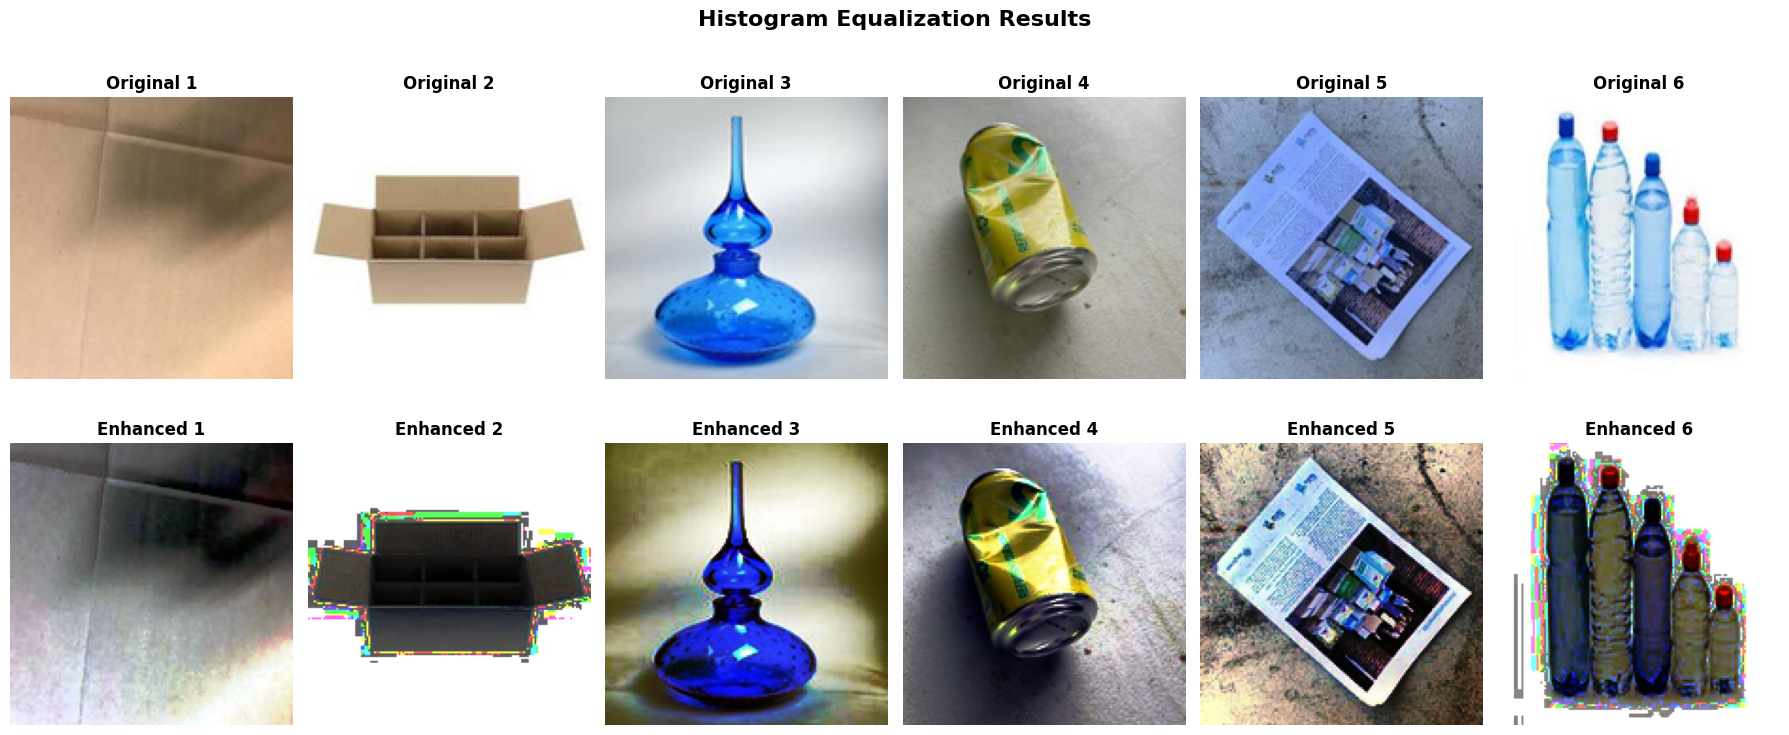


Simple Enhancement Metrics:
Original average brightness: 173.09
Processed average brightness: 137.04
Brightness change: -36.05
⚠️  Images became darker


In [7]:
def visualize_simple_results(original_imgs, processed_imgs, method_name="Processing"):
    """
    Simple visualization without complex dependencies
    """
    
    # Create comparison plot
    fig, axes = plt.subplots(2, 6, figsize=(18, 8))
    
    # Select 6 sample images
    num_samples = min(6, len(original_imgs))
    sample_indices = np.linspace(0, len(original_imgs)-1, num_samples, dtype=int)
    
    for i, idx in enumerate(sample_indices):
        # Original image
        axes[0, i].imshow(original_imgs[idx])
        axes[0, i].set_title(f'Original {i+1}', fontweight='bold')
        axes[0, i].axis('off')
        
        # Processed image
        axes[1, i].imshow(processed_imgs[idx])
        axes[1, i].set_title(f'Enhanced {i+1}', fontweight='bold')
        axes[1, i].axis('off')
    
    plt.suptitle(f'{method_name} Results', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Calculate simple metrics
    orig_brightness = np.mean([np.mean(img) for img in original_imgs])
    proc_brightness = np.mean([np.mean(img) for img in processed_imgs])
    brightness_change = proc_brightness - orig_brightness
    
    print(f"\nSimple Enhancement Metrics:")
    print(f"Original average brightness: {orig_brightness:.2f}")
    print(f"Processed average brightness: {proc_brightness:.2f}")
    print(f"Brightness change: {brightness_change:+.2f}")
    
    if brightness_change > 5:
        print("✅ Images became brighter")
    elif brightness_change < -5:
        print("⚠️  Images became darker")
    else:
        print("✅ Brightness maintained")

# Visualize results
if len(equalized_imgs) > 0:
    visualize_simple_results(original_imgs, equalized_imgs, "Histogram Equalization")
else:
    visualize_simple_results(original_alt, enhanced_alt, "Contrast Enhancement")


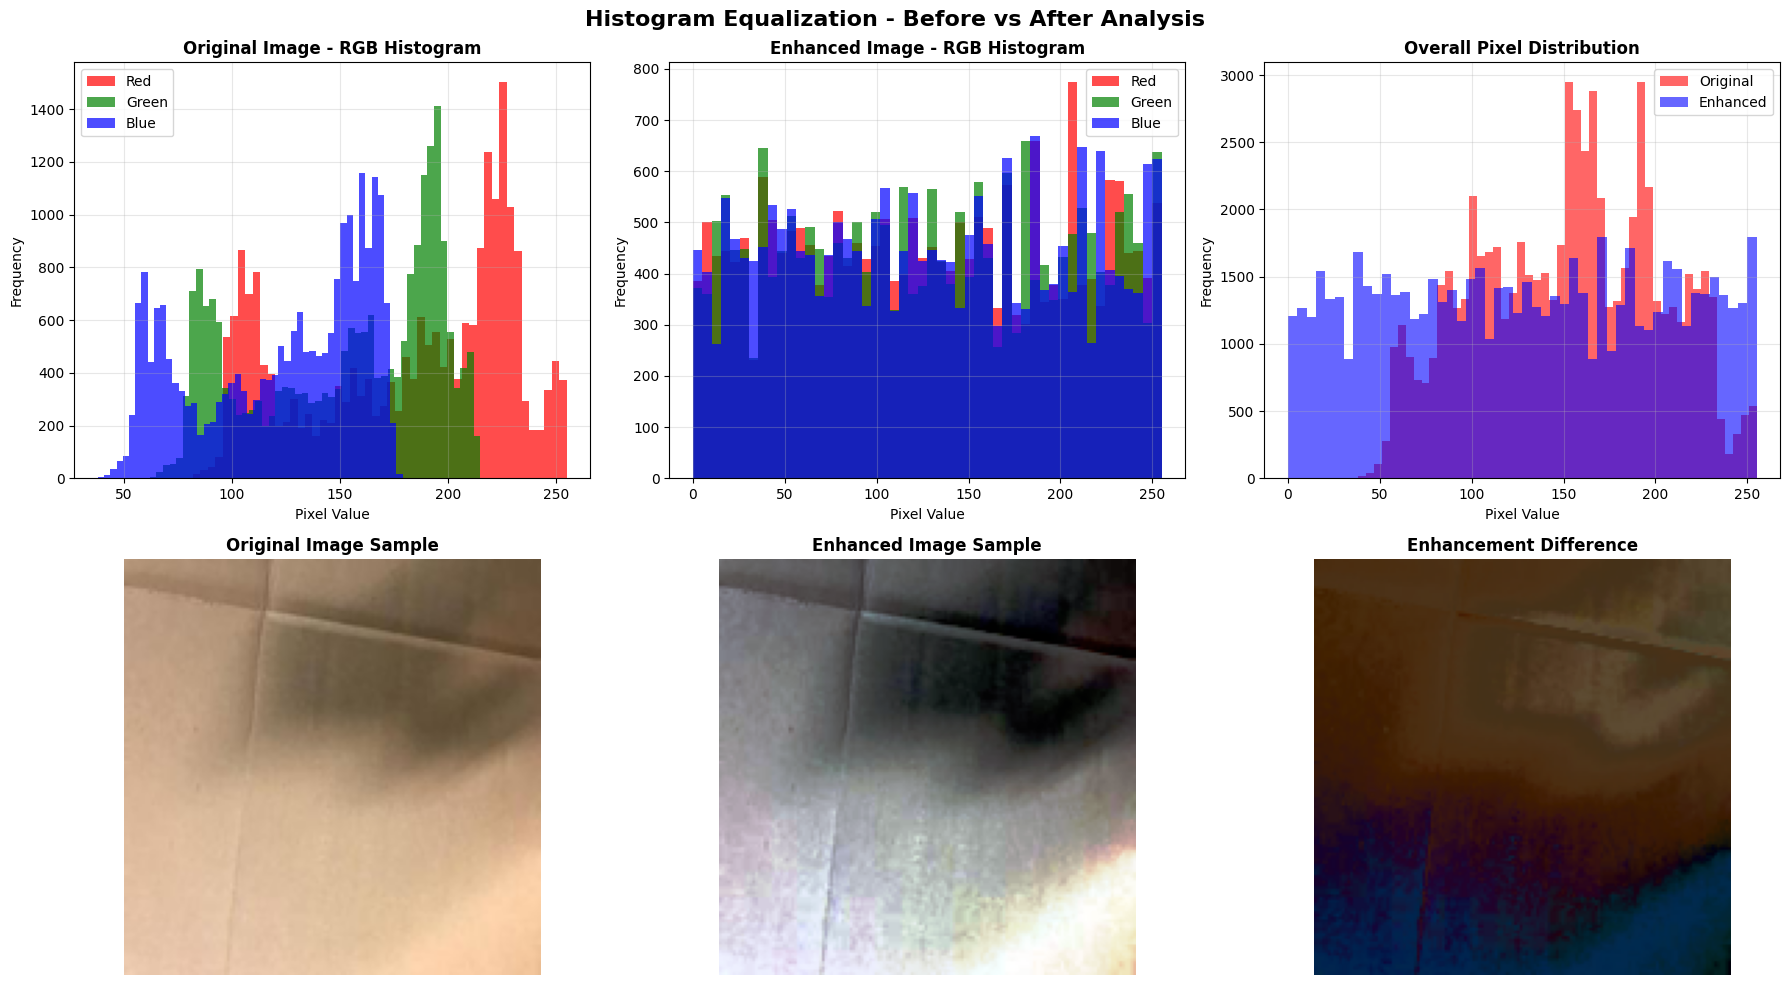

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def create_histogram_comparison(original_imgs, enhanced_imgs):
    """
    Create basic histogram comparison for before and after
    """
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # Sample original and enhanced images
    orig_sample = original_imgs[0]
    enhanced_sample = enhanced_imgs[0]
    
    # RGB histograms for original image
    axes[0, 0].hist(orig_sample[:, :, 0].flatten(), bins=50, alpha=0.7, color='red', label='Red')
    axes[0, 0].hist(orig_sample[:, :, 1].flatten(), bins=50, alpha=0.7, color='green', label='Green')
    axes[0, 0].hist(orig_sample[:, :, 2].flatten(), bins=50, alpha=0.7, color='blue', label='Blue')
    axes[0, 0].set_title('Original Image - RGB Histogram', fontweight='bold')
    axes[0, 0].set_xlabel('Pixel Value')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # RGB histograms for enhanced image
    axes[0, 1].hist(enhanced_sample[:, :, 0].flatten(), bins=50, alpha=0.7, color='red', label='Red')
    axes[0, 1].hist(enhanced_sample[:, :, 1].flatten(), bins=50, alpha=0.7, color='green', label='Green')
    axes[0, 1].hist(enhanced_sample[:, :, 2].flatten(), bins=50, alpha=0.7, color='blue', label='Blue')
    axes[0, 1].set_title('Enhanced Image - RGB Histogram', fontweight='bold')
    axes[0, 1].set_xlabel('Pixel Value')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Combined histogram comparison
    axes[0, 2].hist(orig_sample.flatten(), bins=50, alpha=0.6, label='Original', color='red')
    axes[0, 2].hist(enhanced_sample.flatten(), bins=50, alpha=0.6, label='Enhanced', color='blue')
    axes[0, 2].set_title('Overall Pixel Distribution', fontweight='bold')
    axes[0, 2].set_xlabel('Pixel Value')
    axes[0, 2].set_ylabel('Frequency')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    
    # Image comparison
    axes[1, 0].imshow(orig_sample)
    axes[1, 0].set_title('Original Image Sample', fontweight='bold')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(enhanced_sample)
    axes[1, 1].set_title('Enhanced Image Sample', fontweight='bold')
    axes[1, 1].axis('off')
    
    # Difference visualization
    difference = np.abs(enhanced_sample.astype(float) - orig_sample.astype(float))
    axes[1, 2].imshow(difference.astype(np.uint8))
    axes[1, 2].set_title('Enhancement Difference', fontweight='bold')
    axes[1, 2].axis('off')
    
    plt.suptitle('Histogram Equalization - Before vs After Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Run basic comparison
create_histogram_comparison(original_imgs, equalized_imgs)
